In [1]:
import pandas as pd

In [11]:
import matplotlib.pyplot as plt

In [12]:
import numpy as np

In [2]:
import seaborn as sns

In [ ]:
#Load the datasets

In [7]:
listings_df = pd.read_csv("Listings.csv", encoding='latin1')

C:\Users\Abdul\AppData\Local\Temp\ipykernel_4724\4169836999.py:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_df = pd.read_csv("Listings.csv", encoding='latin1')


In [8]:
reviews_df = pd.read_csv("Reviews.csv")

In [9]:
listings_dictionary_df = pd.read_csv("Listings_data_dictionary.csv")

In [10]:
reviews_dictionary_df = pd.read_csv("Reviews_data_dictionary.csv")

In [ ]:
#Display the first few rows of the dataset:

In [ ]:
#Listings:

In [13]:
print(listings_df.head())

   listing_id                                              name   host_id  \
0      281420    Beautiful Flat in le Village Montmartre, Paris   1466919   
1     3705183                   39 mÃÂ² Paris (Sacre CÃâur)  10328771   
2     4082273               Lovely apartment with Terrace, 60m2  19252768   
3     4797344               Cosy studio (close to Eiffel tower)  10668311   
4     4823489  Close to Eiffel Tower - Beautiful flat : 2 rooms  24837558   

   host_since                 host_location host_response_time  \
0  2011-12-03  Paris, Ile-de-France, France                NaN   
1  2013-11-29  Paris, Ile-de-France, France                NaN   
2  2014-07-31  Paris, Ile-de-France, France                NaN   
3  2013-12-17  Paris, Ile-de-France, France                NaN   
4  2014-12-14  Paris, Ile-de-France, France                NaN   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                 NaN                   NaN                 f   
1         

In [ ]:
#Reviews

In [18]:
print(reviews_df.head())

   listing_id  review_id        date  reviewer_id
0       11798  330265172  2018-09-30     11863072
1       15383  330103585  2018-09-30     39147453
2       16455  329985788  2018-09-30      1125378
3       17919  330016899  2018-09-30    172717984
4       26827  329995638  2018-09-30     17542859


In [15]:
# Check for duplicates in the listings
duplicates = listings_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [16]:
# Convert date-related columns to datetime objects
listings_df['host_since'] = pd.to_datetime(listings_df['host_since'], errors='coerce')

In [17]:
# Converting boolean columns from 't'/'f' to True/False
listings_df['host_is_superhost'] = listings_df['host_is_superhost'].map({'t': True, 'f': False})
listings_df['instant_bookable'] = listings_df['instant_bookable'].map({'t': True, 'f': False})

In [24]:
listings_df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False


In [19]:
# Converting 'price' to a numeric value if it's a string that includes currency symbols
# Assuming price is in a format like '$85.00'
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

In [26]:
# Converting review scores from strings to numeric if they are strings
# This assumes the scores columns are read as strings; otherwise, this step isn't necessary.
columns_to_convert = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                      'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                      'review_scores_value']
for column in columns_to_convert:
    listings_df[column] = pd.to_numeric(listings_df[column], errors='coerce')
# fill missing values after conversion
for column in columns_to_convert:
    listings_df[column].fillna(listings_df[column].mean(), inplace=True)

In [ ]:
# re-check the dataset info to confirm change

In [27]:
print(listings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [28]:
# Identify columns with missing values
print(listings_df.isnull().sum())

listing_id                          0
name                              175
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating                0
review_score

In [29]:
#imputing with the median value
listings_df['host_response_rate'].fillna((listings_df['host_response_rate'].median()), inplace=True)

In [30]:
#replace missing values with the mode
listings_df['host_response_time'].fillna(listings_df['host_response_time'].mode()[0], inplace=True)

In [31]:
# Drop unwanted columns
listings_df.drop(columns=['neighbourhood', 'district'], inplace=True)

In [33]:
# Check for columns that have 'object' dtype - this may indicate categorical data
# For columns like 'room_type', if they're categorical, convert to category dtype
listings_df['room_type'] = listings_df['room_type'].astype('category')

In [34]:
# Addressing missing values in 'bedrooms' by filling with a reasonable value, like the mode
listings_df['bedrooms'].fillna((listings_df['bedrooms'].mode()[0]), inplace=True)

In [35]:
# After imputing missing values, it's a good idea to confirm no missing values remain
print(listings_df.isnull().sum())

listing_id                          0
name                              175
host_id                             0
host_since                        165
host_location                     840
host_response_time                  0
host_response_rate                  0
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                            0
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating                0
review_scores_accuracy              0
review_scores_cleanliness           0
review_score

In [36]:
# Recheck the structure of the dataframe to ensure all data types are correct
print(listings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           279712 non-null  object        
 6   host_response_rate           279712 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [37]:
listings_df['name'].fillna('No name provided', inplace=True)

In [38]:
# Since 'host_id' is crucial for identifying the host, we drop the rows with missing host IDs.
listings_df.dropna(subset=['host_id'], inplace=True)

In [39]:
listings_df.dropna(subset=['host_since'], inplace=True)

In [40]:
#fill missing values with 'unknown'
listings_df['host_response_time'].fillna('unknown', inplace=True)

In [41]:
# For 'host_acceptance_rate' with a large number of missing values,
# fill missing values with the median.
listings_df['host_acceptance_rate'].fillna(listings_df['host_acceptance_rate'].median(), inplace=True)

In [42]:
print(listings_df.isnull().sum())

listing_id                       0
name                             0
host_id                          0
host_since                       0
host_location                  675
host_response_time               0
host_response_rate               0
host_acceptance_rate             0
host_is_superhost                0
host_total_listings_count        0
host_has_profile_pic             0
host_identity_verified           0
city                             0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bedrooms                         0
amenities                        0
price                            0
minimum_nights                   0
maximum_nights                   0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_locati

In [43]:
print(listings_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 279547 entries, 0 to 279711
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279547 non-null  int64         
 1   name                         279547 non-null  object        
 2   host_id                      279547 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           279547 non-null  object        
 6   host_response_rate           279547 non-null  float64       
 7   host_acceptance_rate         279547 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified       27

C:\Users\Abdul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


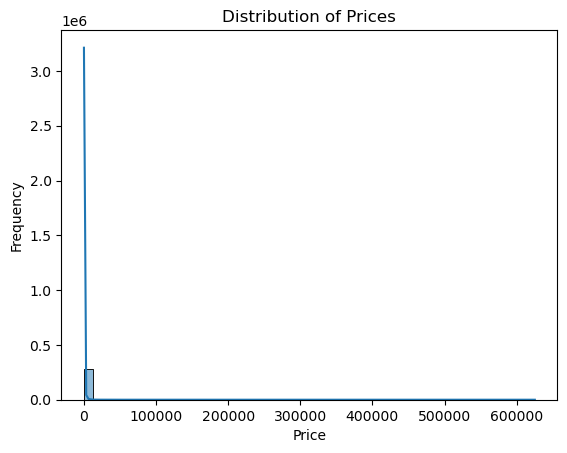

In [44]:
# Visualize the distribution of prices
sns.histplot(listings_df['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [45]:
# Apply a logarithmic transformation to the 'price' column to reduce skewness
listings_df['log_price'] = np.log1p(listings_df['price'])

C:\Users\Abdul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


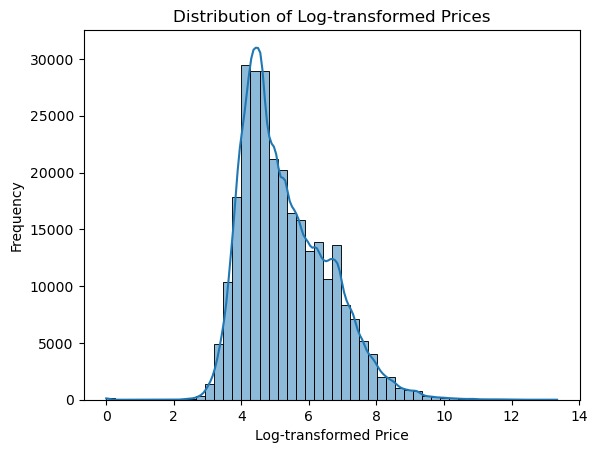

In [46]:
# Now let's plot the distribution of the transformed prices
sns.histplot(listings_df['log_price'], bins=50, kde=True)
plt.title('Distribution of Log-transformed Prices')
plt.xlabel('Log-transformed Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Distribution of Log-transformed Prices:
# The histogram of log-transformed prices shows that after the transformation,
# the price distribution appears more normally distributed. 

In [49]:
# Summary statistics for the 'price' column
print(listings_df['price'].describe())

count    279547.000000
mean        608.884635
std        3442.785253
min           0.000000
25%          75.000000
50%         150.000000
75%         474.000000
max      625216.000000
Name: price, dtype: float64


C:\Users\Abdul\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


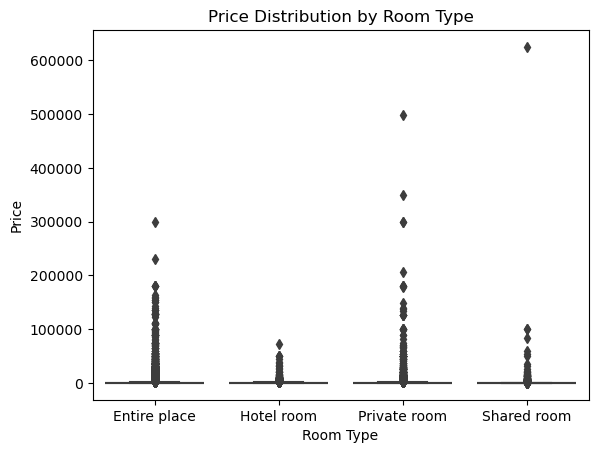

In [50]:
# Boxplot to examine the price distribution across different room types
sns.boxplot(x='room_type', y='price', data=listings_df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

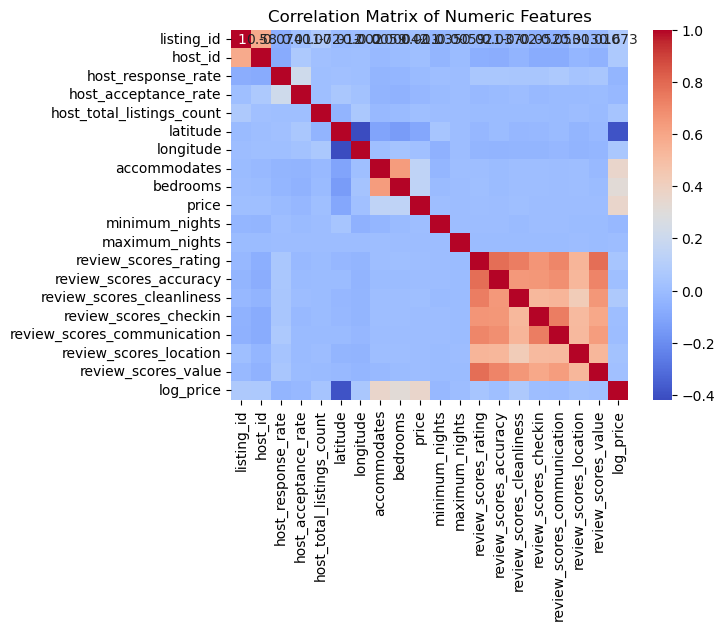

In [57]:
# Select only the numeric columns for the correlation matrix
numeric_cols = listings_df.select_dtypes(include=[np.number]).columns
corr_matrix = listings_df[numeric_cols].corr()

# plotting the heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [ ]:
# Correlation Matrix:
# The heatmap of the correlation matrix indicates that some variables
# have a stronger linear relationship with log_price than others.
# For example, variables such as accommodates, bedrooms,
# and potentially review_scores_location may have a more significant positive correlation with log_price,
# suggesting these factors could be good predictors of price.

In [58]:
# Create a new feature for the length of the host's name as a proxy for detail orientation
listings_df['host_name_length'] = listings_df['name'].apply(len)

# Convert 'instant_bookable' to a boolean type
listings_df['instant_bookable'] = listings_df['instant_bookable'].map({'t': True, 'f': False})

# One-hot encode 'room_type'
room_type_dummies = pd.get_dummies(listings_df['room_type'], prefix='room_type')
listings_df = pd.concat([listings_df, room_type_dummies], axis=1)

In [59]:
listings_df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,log_price,host_name_length,room_type_Entire place,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",within an hour,1.0,0.98,False,1.0,...,10.0,10.0,10.0,NaN,3.988984,46,True,False,False,False
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",within an hour,1.0,0.98,False,1.0,...,10.0,10.0,10.0,NaN,4.795791,31,True,False,False,False
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",within an hour,1.0,0.98,False,1.0,...,10.0,10.0,10.0,NaN,4.499810,35,True,False,False,False
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",within an hour,1.0,0.98,False,1.0,...,10.0,10.0,10.0,NaN,4.077537,35,True,False,False,False
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",within an hour,1.0,0.98,False,1.0,...,10.0,10.0,10.0,NaN,4.110874,48,True,False,False,False


In [60]:
#test if there is a significant difference in price between different room types
from scipy.stats import f_oneway

# ANOVA test to compare the means of prices among different room types
room_types = listings_df['room_type'].unique()
grouped_data = [listings_df['price'][listings_df['room_type'] == room] for room in room_types]
anova_results = f_oneway(*grouped_data)
print(f"ANOVA results: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}")


ANOVA results: F-statistic = 79.95801488553991, p-value = 1.0663366752082171e-51


C:\Users\Abdul\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


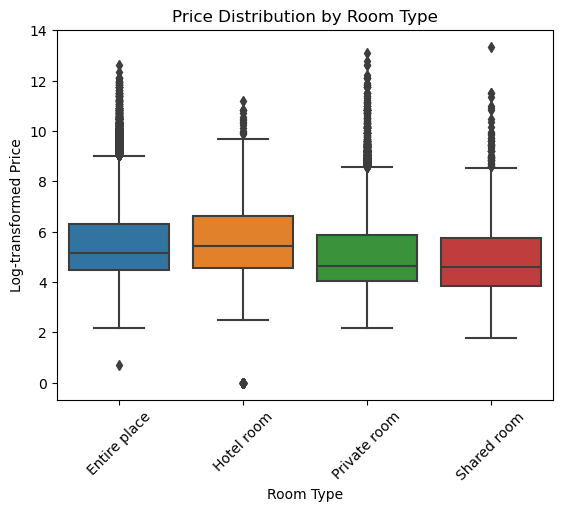

In [64]:
sns.boxplot(x='room_type', y='log_price', data=listings_df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Log-transformed Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Price Distribution by Room Type: The boxplot shows a clear difference
# in the distribution of prices among different room types. This suggests
# that certain room types tend to be priced higher or lower than others.
# For instance, 'Entire place' and 'Hotel room' types may have higher median prices
# compared to 'Private room' and 'Shared room'.

In [ ]:
print("""
In conclusion:
1 - Room type is a significant factor in pricing strategy for listings.
2 - The number of accommodations and bedrooms may positively affect the listing price, reflecting the size and capacity of the listing.
3 - Listings with better location scores might command higher prices, possibly due to desirability or convenience factors.
4 - The data contains outliers that could represent unique or premium listings, or they could be errors.

""")